In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Unsupervised learning

Passando para a análise dos dados, começamos aplicar algoritmos de aprendizagem não-supervisionada, ou seja, que não tem em conta a variável dependente. Retiram inferências apenas a partir dos descritores, podendo ser aplicados para reduzir a dimensionalidade do dataset, e até mesmo agrupar os dados de acordo com a sua proximidade.

Os algoritmos de aprendizagem não-supervivionada, como o PCA, são sensíveis às escalas dos valores e outliers. Uma vez que já se efetuou a standardização dos dados, não é necessário efetuar esse passo novamente. Relativamente aos outliers, procuraram-se as linhas que contêm apenas valores inferiores a 3, ou seja, que contêm valores inferiores a 3 vezes o desvio padrão (considerando-se outlier). Desta forma, são removidas as linhas que não satisfazem esta condição.

In [3]:
X_train_sc = pd.read_csv("Files/X_train_sc.csv", index_col=0)
X_train_sc_z = pd.read_csv("Files/X_train_sc_z.csv", index_col=0)

y_train = pd.read_csv("Files/y_train.csv", index_col=0)
y_train = pd.Series(y_train["tm"])

In [4]:
# get k best scores between features and label -> pearson, spearman, f_regression and multi_info_regression
def get_k_best_corrs(k, scores):
    idxs = np.argsort(scores)[-k:]
    feats = X_train_sc.columns[idxs]
    scores = np.sort(scores)[-k:]
    return {f: c for f, c in zip(feats, scores)}

In [5]:
pearson_corrs = [float(elem.strip()) for elem in open("Files/pearson.txt").readlines()]
spearman_corrs = [float(elem.strip()) for elem in open("Files/spearman.txt").readlines()]

best_pearson = get_k_best_corrs(100, pearson_corrs)
best_spearman = get_k_best_corrs(100, spearman_corrs)

In [6]:
# Create new training data based on the top 100 features (for both spearman and pearson)

X_train_SM = X_train_sc_z.loc[:,best_spearman.keys()]
X_train_PS = X_train_sc_z.loc[:,best_pearson.keys()]

In [7]:
X_train_SM.head()

,GQR,ETK,KRF,GKM,LVM,ADG,RQG,TS,SAN,NRS,...,IGM,_SolventAccessibilityT23,QPM,NIW,T,CMA,K,LMY,ICM,_SolventAccessibilityC1
0,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,1.817367,-0.300111,-0.921269,-0.315313,-0.279966,...,-0.248737,0.151038,-0.218189,-0.192412,0.309394,-0.193642,-0.378718,-0.226035,-0.185827,-0.107799
1,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,-0.073354,-0.315313,-0.279966,...,-0.248737,-0.458539,-0.218189,-0.192412,-0.678440,-0.193642,-1.029394,-0.226035,-0.185827,1.151108
2,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,-0.921269,-0.315313,-0.279966,...,-0.248737,-0.702369,-0.218189,-0.192412,-0.970259,-0.193642,0.950440,-0.226035,-0.185827,0.243955
3,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,-0.126348,-0.315313,-0.279966,...,-0.248737,-0.214708,-0.218189,-0.192412,-0.065802,-0.193642,0.366500,-0.226035,-0.185827,-0.589146
4,-0.287743,-0.301368,-0.289975,-0.248041,-0.26803,-0.335474,-0.300111,0.032636,-0.315313,-0.279966,...,-0.248737,1.705457,-0.218189,-0.192412,1.810782,-0.193642,-0.450274,-0.226035,-0.185827,-1.644406


In [8]:
X_train_PS.head()

,DKY,GQ,EAQ,AV,FAT,KKM,AKK,QT,KLM,KPN,...,LMY,MAI,CMA,NIW,_SolventAccessibilityT23,_SolventAccessibilityC1,ICM,KGQ,AR,AL
0,-0.268679,-0.238122,-0.347418,0.830322,-0.284926,-0.271144,-0.392607,-0.764645,-0.281996,-0.253805,...,-0.226035,-0.242304,-0.193642,-0.192412,0.151038,-0.107799,-0.185827,-0.258678,0.022070,1.177363
1,-0.268679,0.738060,-0.347418,-0.988489,-0.284926,-0.271144,-0.392607,0.331636,-0.281996,-0.253805,...,-0.226035,-0.242304,-0.193642,-0.192412,-0.458539,1.151108,-0.185827,-0.258678,3.230838,-1.194203
2,-0.268679,-0.681842,-0.347418,-0.988489,-0.284926,-0.271144,-0.392607,2.421422,-0.281996,-0.253805,...,-0.226035,-0.242304,-0.193642,-0.192412,-0.702369,0.243955,-0.185827,-0.258678,-0.822343,0.184270
3,-0.268679,-0.681842,-0.347418,-0.442846,-0.284926,-0.271144,-0.392607,-0.764645,-0.281996,-0.253805,...,-0.226035,-0.242304,-0.193642,-0.192412,-0.214708,-0.589146,-0.185827,-0.258678,-0.822343,0.614116
4,-0.268679,-0.681842,-0.347418,-0.333717,-0.284926,-0.271144,-0.392607,4.168620,-0.281996,-0.253805,...,-0.226035,-0.242304,-0.193642,-0.192412,1.705457,-1.644406,-0.185827,-0.258678,-0.062371,-1.194203


In [9]:
#Removing outliers
X_train_PS_clean = X_train_PS[(np.abs(X_train_PS) < 3).all(axis=1)]
X_train_PS_clean.index = range(len(X_train_PS_clean))
X_train_SM_clean = X_train_SM[(np.abs(X_train_SM) < 3).all(axis=1)]
X_train_SM_clean.index = range(len(X_train_SM_clean))

y_train_PS = y_train.loc[list((np.abs(X_train_PS) < 3).all(axis=1))]
y_train_PS.index = range(len(y_train_PS))
y_train_SM = y_train.loc[list((np.abs(X_train_SM) < 3).all(axis=1))]
y_train_SM.index = range(len(y_train_SM))

print(X_train_PS.shape)
print(X_train_PS_clean.shape)
print(y_train_PS.shape)
print()
print(X_train_SM.shape)
print(X_train_SM_clean.shape)
print(y_train_SM.shape)
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

(28403, 100)
(5948, 100)
(5948,)

(28403, 100)
(6477, 100)
(6477,)


In [10]:
X_train_PS_clean.head()

,DKY,GQ,EAQ,AV,FAT,KKM,AKK,QT,KLM,KPN,...,LMY,MAI,CMA,NIW,_SolventAccessibilityT23,_SolventAccessibilityC1,ICM,KGQ,AR,AL
0,-0.268679,0.427456,-0.347418,-0.079084,-0.284926,-0.271144,-0.392607,0.948294,-0.281996,-0.253805,...,-0.226035,-0.242304,-0.193642,-0.192412,0.455826,-0.515092,-0.185827,-0.258678,0.233173,0.273203
1,-0.268679,0.715874,-0.347418,0.393807,-0.284926,-0.271144,-0.392607,-0.319281,-0.281996,-0.253805,...,-0.226035,-0.242304,-0.193642,-0.192412,-0.397581,0.095848,-0.185827,-0.258678,-0.294585,0.110158
2,-0.268679,-0.149379,-0.347418,-0.551975,-0.284926,-0.271144,-0.392607,0.057566,-0.281996,-0.253805,...,-0.226035,-0.242304,-0.193642,-0.192412,0.852051,-0.848332,-0.185827,-0.258678,-0.315695,-0.838468
3,-0.268679,-0.681842,-0.347418,-0.388282,-0.284926,-0.271144,-0.392607,-0.764645,-0.281996,-0.253805,...,-0.226035,-0.242304,-0.193642,-0.192412,-0.275666,0.577195,-0.185827,-0.258678,0.570938,0.258381
4,-0.268679,0.383084,-0.347418,-0.551975,-0.284926,-0.271144,-0.392607,-0.764645,-0.281996,-0.253805,...,-0.226035,-0.242304,-0.193642,-0.192412,-0.184229,-0.311446,-0.185827,-0.258678,0.190952,-0.126998


Foi possível remover 22222 amostras do dataset do pearson, e 21726 amostras do dataset do spearman. As novas variáveis criadas têm valores mais homogênios que vão permitir uma prestação mais fidedígna dos algoritmos de aprendizagem não-supervisionada. Vamos analisar o efeito de 3 algoritmos: **PCA**, **tSNE** e **KMeans**.

#### PCA

Começamos com o algorítmo do PCA (Principal Components Analysis). Este algoritmo tem o objetivo de reduzir a dimensionalidade, ao encontrar uma nova forma de representar os dados que explique o máximo da variância possível. Desta forma, é geralmente possível eliminar informação que não contribui muito para a variabilidade dos dados, fornecendo dados menos ruidosos aos eventuais algoritmos de aprendizagem aplicados.

In [27]:
from sklearn.decomposition import PCA

pca_SM = PCA()
pca_SM.fit(X_train_SM_clean)
x_reduced_SM = pca_SM.transform(X_train_SM_clean)

pca_PS = PCA()
pca_PS.fit(X_train_PS_clean)
x_reduced_PS = pca_PS.transform(X_train_PS_clean)

[1.58349946e+01 1.19868417e+01 7.69860902e+00 5.78776121e+00
 4.55715104e+00 3.61589294e+00 3.09353735e+00 2.80958183e+00
 2.66072014e+00 2.34178112e+00 2.09030455e+00 1.95181483e+00
 1.92950259e+00 1.77384607e+00 1.70977808e+00 1.68653116e+00
 1.57966308e+00 1.48635047e+00 1.36186695e+00 1.30986550e+00
 1.25323662e+00 1.10317744e+00 1.07231966e+00 1.00774743e+00
 9.86784333e-01 9.46418059e-01 9.26852830e-01 8.92194457e-01
 8.77838259e-01 8.48371205e-01 8.46325056e-01 8.29659537e-01
 8.01798273e-01 7.94884979e-01 7.80413081e-01 7.67277296e-01
 7.44147847e-01 7.16520115e-01 7.05616514e-01 6.92158194e-01
 6.65515813e-01 5.57787611e-01 5.55566651e-01 5.27902376e-01
 5.06248142e-01 4.82487518e-01 4.39759189e-01 4.06054190e-01
 4.02015064e-01 3.83264184e-01 2.13263837e-01 3.12436083e-30
 1.28265142e-30 1.10603637e-30 7.49222684e-31 6.22368450e-31
 5.56777642e-31 4.89260988e-31 3.17219354e-31 2.29352485e-31
 1.90981690e-31 9.19826402e-32 8.52280646e-32 8.45212637e-32
 8.45212637e-32 8.452126

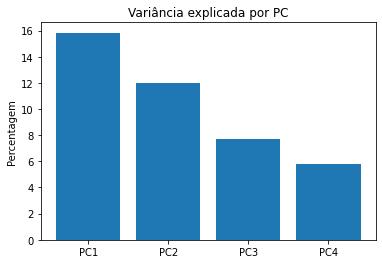

In [28]:
print(pca_SM.explained_variance_ratio_*100)

print()
print("Spearman:")
print(f"Número total de PCs: {pca_SM.n_components_}")
print(f"Número de PCs necessários para explicar 95% da variância: \
{sum(pca_SM.explained_variance_ratio_.cumsum() < 0.95) + 1}")

plt.bar(range(4), pca_SM.explained_variance_ratio_[:4]*100)
plt.xticks(range(4), ['PC'+str(i) for i in range(1,5)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

[1.37852940e+01 1.16982816e+01 9.24791356e+00 6.62364218e+00
 5.17924856e+00 4.23030726e+00 3.15678657e+00 2.96802570e+00
 2.75196204e+00 2.59458985e+00 2.07394720e+00 2.06367677e+00
 1.93450496e+00 1.87517368e+00 1.78896947e+00 1.67624857e+00
 1.56575690e+00 1.53979298e+00 1.48090454e+00 1.44162142e+00
 1.34480829e+00 1.20400829e+00 1.12530345e+00 1.09938136e+00
 9.86151953e-01 9.26902232e-01 8.61259244e-01 8.56166813e-01
 8.48130658e-01 8.13589295e-01 7.91618237e-01 7.36713830e-01
 7.26963634e-01 7.06370113e-01 6.50835634e-01 6.21134742e-01
 5.93519139e-01 5.72303308e-01 5.35604244e-01 5.14758114e-01
 5.03816602e-01 4.96057283e-01 4.45902545e-01 4.34321668e-01
 4.02778364e-01 3.97518502e-01 3.81252062e-01 2.98513360e-01
 2.56083975e-01 1.91585319e-01 1.70065231e-28 2.71896789e-30
 1.25086169e-30 6.88140155e-31 5.77295547e-31 5.51021869e-31
 4.03642387e-31 3.24431331e-31 2.66671339e-31 2.60576409e-31
 1.65624566e-31 1.19823370e-31 1.15937482e-31 9.37306719e-32
 6.41252769e-32 6.172760

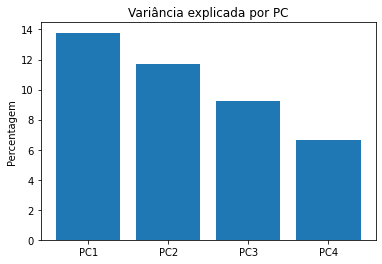

In [29]:
print(pca_PS.explained_variance_ratio_*100)

print()
print("Pearson:")
print(f"Número total de PCs: {pca_PS.n_components_}")
print(f"Número de PCs necessários para explicar 95% da variância: \
{sum(pca_PS.explained_variance_ratio_.cumsum() < 0.95) + 1}")

plt.bar(range(4), pca_PS.explained_variance_ratio_[:4]*100)
plt.xticks(range(4), ['PC'+str(i) for i in range(1,5)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

Os resultados demonstram que, para os 100 melhores features selecionados pelo método de spearman, é possível utilizar apenas 41 componentes para explicar 95% da variância, e para os 100 features selecionados pelo método de spearman, é possível utilizar apenas 38 componentes.

*NOTA: ao utilizar os dados isentos de outliers (valores standardizados superiores a 3), obtivemos resultados muito insatisfatórios na aprendizagem supervisionada, pelo que decidimos não utilizar estes dados, nem os reduzidos pelo PCA.*

#### t-SNE

tSNE ('t-distributed Stochastic Neighbor Embedding') aplica um método de redução de dimensionalidade semelhante ao PCA, mas tem como principal foco a visualização dos dados transformados. Neste caso, é necessário definir em quantos grupos deverão ser separados os dados. Como a variável dependente se trata de de valores contínuos, não é óbvio o número de grupos que se deverá separar os dados. Desta forma, optou-se por separá-los em 3 grupos baseados na variável dependente:

- os que estão próximos da média;
- os que estão acima de um desvio-padrão da média;
- os que estão abaixo de um desvio-padrão da média.

Apesar deste algoritmo não ser tão sensível a outliers como no caso do PCA, vamos efetuar a análise sem outliers para visualizar melhor os gráficos resultantes. É, contudo, um algoritmo com elevado peso computacional, pelo que pode demorar bastante tempo a correr.

In [11]:
mean = y_train.mean()
std = y_train.std()

ub = mean+std
lb = mean-std

In [12]:
import warnings
from sklearn.manifold import TSNE

warnings.simplefilter("ignore")

tsne = TSNE(n_components=2, n_iter=1000)

points_sm = tsne.fit_transform(X_train_SM_clean)
points_ps = tsne.fit_transform(X_train_PS_clean)

group1_sm = y_train_SM.index[y_train_SM > ub]
group2_sm = y_train_SM.index[(y_train_SM <= ub) & (y_train_SM > lb)]
group3_sm = y_train_SM.index[y_train_SM <= lb]

group1_ps = y_train_PS.index[y_train_PS > ub]
group2_ps = y_train_PS.index[(y_train_PS <= ub) & (y_train_PS > lb)]
group3_ps = y_train_PS.index[y_train_PS <= lb]

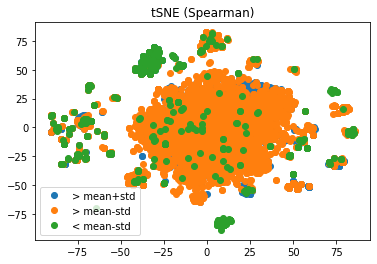

In [13]:
for group, lab in zip((group1_sm, group2_sm, group3_sm), ("> mean+std", "> mean-std", "< mean-std")):
    plt.plot(points_sm[group,0], points_sm[group,1], "o", label=lab)
plt.title("tSNE (Spearman)")
plt.legend(loc="best")
plt.show()

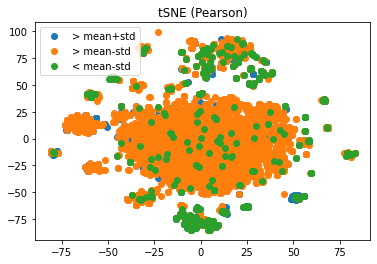

In [14]:
for group, lab in zip((group1_ps, group2_ps, group3_ps), ("> mean+std", "> mean-std", "< mean-std")):
    plt.plot(points_ps[group,0], points_ps[group,1], "o", label=lab)
plt.title("tSNE (Pearson)")
plt.legend(loc="best")
plt.show()

Os resultados demonstram que não é possível separar de forma clara os pontos com base nos grupos definidos.

#### KMeans

KMeans é um método de agrupamento de dados de acordo com a proximidade dos seus valores. Define um número pré-definido (valor 'k') de pontos no dataset aleatórios para tomarem o papel de centroides. Os pontos mais próximos do mesmo centróide são considerados como pertencentes ao mesmo grupo, redefinindo-se um novo centróide que toma o valor da média entre as coordenadas de cada ponto do mesmo grupo. O processo repete até o número de iterações pré-definido é atingido, ou não há alterações aos centróides.

Para determinar o valor de 'k' ótimo, vamos aplicar o "elbow method", que permite determinar o valor de 'k' a partir do qual o valor do custo deixa de diminuir de forma significativa. Isto averigua-se ao observar o ponto no gráfico que forma um ângulo mais significativo.

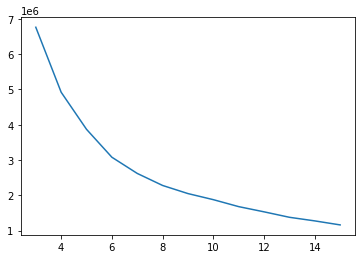

In [15]:
from sklearn.cluster import KMeans

inercias = []
for k in range(3,16):
    kmeans_sm = KMeans(n_clusters=k, max_iter=1000)
    kmeans_sm.fit(points_sm)
    inercias.append(kmeans_sm.inertia_)

plt.plot(range(3,16), inercias)
plt.show()

Os pontos mais significantes aparentam ser os de valor 'k' igual a 4 e 6, sendo que o de valor 6 aparenta ser o mais significante. Prosseguimos então com a análise utilizando k = 6.

In [16]:
from sklearn.cluster import KMeans

k=6
kmeans_sm = KMeans(n_clusters=k, max_iter=1000)
kmeans_ps = KMeans(n_clusters=k, max_iter=1000)

#Using the TSNE fitted points for the KMeans analysis
kmeans_sm.fit(points_sm)
kmeans_ps.fit(points_ps)


labels_sm = kmeans_sm.labels_
labels_ps = kmeans_ps.labels_

centroids_sm = kmeans_ps.cluster_centers_
centroids_ps = kmeans_sm.cluster_centers_

In [17]:
pd.crosstab(labels_ps, y_train_PS, rownames=['clusters'] )

tm,10.0,12.0,15.0,16.6,17.2,20.0,21.7,22.0,22.5,23.0,...,90.3,90.4,90.7,90.8,91.0,91.1,91.2,91.4,91.5,91.6
clusters,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,5,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,3,0,1,0,...,1,1,2,1,2,1,0,1,1,0
3,0,0,1,0,1,2,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
pd.crosstab(labels_sm, y_train_SM, rownames=['clusters'] )

tm,10.0,12.0,15.0,16.6,20.0,21.7,22.0,22.5,23.1,23.5,...,90.6,90.7,90.8,91.0,91.1,91.2,91.3,91.4,91.5,91.6
clusters,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,3,3,1,0,0,...,1,2,2,3,1,0,1,2,1,1
2,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Para esta análise, iremos utilizar os resultados do tSNE para o dataset do Spearman, para tentar afetuar uma análise mais precisa. Usamos ambas as componentes principais geradas para visualizar os resultados.

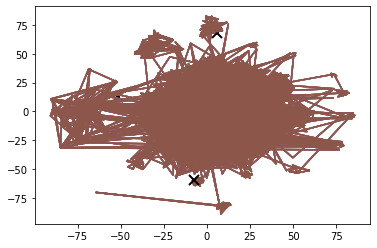

In [19]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = points_sm[list(np.where(labels_sm==i)[0]),:]
    #print(ds)

    # plot the data observations (only 2 first colums)
    plt.plot(points_sm[:,0], points_sm[:,1])
    #plt.plot(ds["_SolventAccessibilityT23"],ds["_SolventAccessibilityC1"],'o')
    # plot the centroids
    lines = plt.plot(centroids_sm[i,0],centroids_sm[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)    # x size
    plt.setp(lines,mew=2.0)    # line thickness
plt.show()

Os resultados não são de todo satisfatórios.

Desta forma, prosseguimos com a análise KMeans do dataset do Pearson com os dados não transformados. Vamos selecionar as coordenadas ("_SolventAccessibilityT23", "_SolventAccessibilityC1") para visualizar num gráfico e tentar observar uma separação entre amostras.

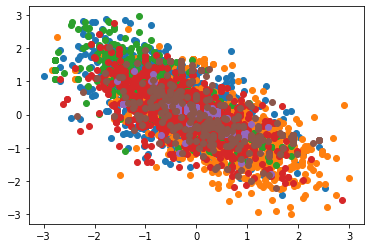

In [20]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = X_train_PS_clean.iloc[list(np.where(labels_ps==i)[0])]
    # plot the data observations (only 2 first colums)
    plt.plot(ds["_SolventAccessibilityT23"],ds["_SolventAccessibilityC1"],'o')
plt.show()

Como se pode observar, os pontos não são separáveis, pelo que o algoritmo não foi capaz de devolver um resultado desejável.